<a href="https://colab.research.google.com/github/Dhanya-46/Web-development/blob/main/Advanced_Fake_News_Detection_TwoDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Advanced Fake News Detection
This notebook enhances fake news detection using modern NLP techniques, advanced models, and interpretability tools.

## 📥 1. Load Data from `True.csv` and `Fake.csv`

In [4]:
import pandas as pd

# Load the datasets
true_df = pd.read_csv("/content/True.csv")
fake_df = pd.read_csv("/content/Fake.csv")

# Add label columns
true_df['label'] = 'REAL'
fake_df['label'] = 'FAKE'

# Combine datasets
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42).reset_index(drop=True)
df['text'] = df['title'] + " " + df['text']
df.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,BREAKING: GOP Chairman Grassley Has Had Enoug...,News,"July 21, 2017",FAKE
1,Failed GOP Candidates Remembered In Hilarious...,Failed GOP Candidates Remembered In Hilarious...,News,"May 7, 2016",FAKE
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,News,"December 3, 2016",FAKE
3,California AG pledges to defend birth control ...,California AG pledges to defend birth control ...,politicsNews,"October 6, 2017",REAL
4,AZ RANCHERS Living On US-Mexico Border Destroy...,AZ RANCHERS Living On US-Mexico Border Destroy...,politics,"Apr 25, 2017",FAKE


## 🧹 2. Text Preprocessing (Advanced)

In [5]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

df['processed_text'] = df['text'].apply(preprocess)
df['processed_text'].head()

,processed_text
0,breaking gop chairman grassley demand trump jr...
1,fail gop candidate remember hilarious mocking ...
2,mike pence new dc neighbor hilariously troll h...
3,california ag pledge defend birth control insu...
4,az rancher live mexico border destroy nancy pe...


## 📊 3. Exploratory Data Analysis & Word Cloud

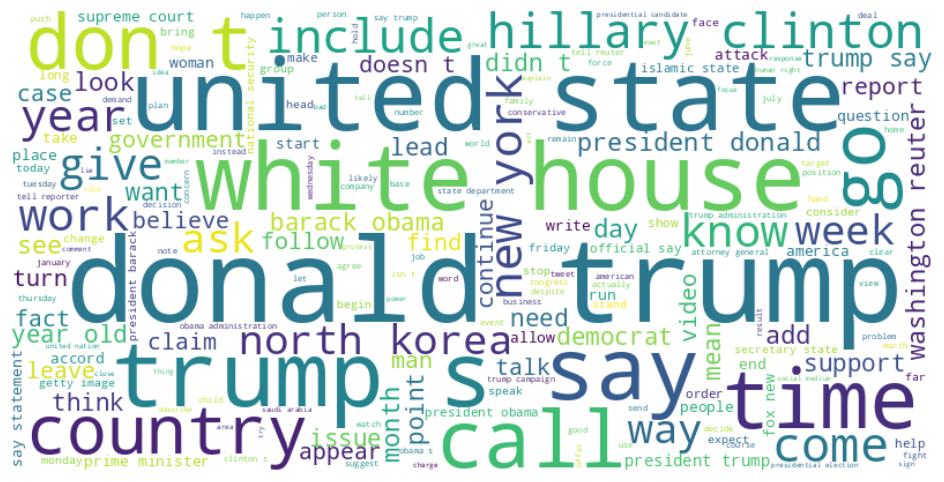

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 🧠 4. Feature Extraction with TF-IDF and SVD

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['processed_text'])

svd = TruncatedSVD(n_components=300)
X_svd = svd.fit_transform(X_tfidf)

y = df['label'].map({'FAKE': 0, 'REAL': 1})
df.head()

,title,text,subject,date,label,processed_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,BREAKING: GOP Chairman Grassley Has Had Enoug...,News,"July 21, 2017",FAKE,breaking gop chairman grassley demand trump jr...
1,Failed GOP Candidates Remembered In Hilarious...,Failed GOP Candidates Remembered In Hilarious...,News,"May 7, 2016",FAKE,fail gop candidate remember hilarious mocking ...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,News,"December 3, 2016",FAKE,mike pence new dc neighbor hilariously troll h...
3,California AG pledges to defend birth control ...,California AG pledges to defend birth control ...,politicsNews,"October 6, 2017",REAL,california ag pledge defend birth control insu...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,AZ RANCHERS Living On US-Mexico Border Destroy...,politics,"Apr 25, 2017",FAKE,az rancher live mexico border destroy nancy pe...


## 🤖 5. Model Building

In [10]:
from sklearn.model_selection import train_test_split

# Assuming X_svd and y are already created
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)



Logistic Regression
Accuracy: 0.9771714922048997
ROC-AUC Score: 0.9970929139267725
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4669
           1       0.97      0.98      0.98      4311

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



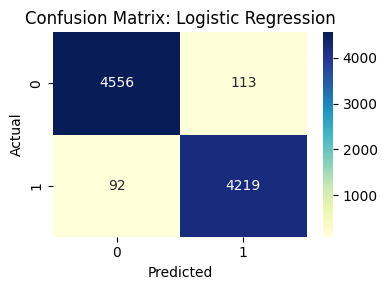


Random Forest
Accuracy: 0.9590200445434298
ROC-AUC Score: 0.9914881261029691
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4669
           1       0.96      0.96      0.96      4311

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



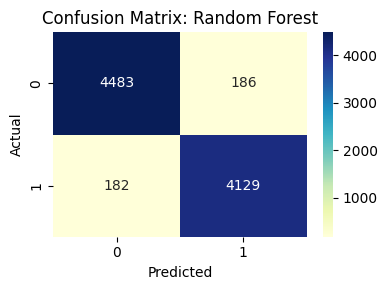


Decision Tree
Accuracy: 0.9055679287305123
ROC-AUC Score: 0.9048662367295327
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4669
           1       0.91      0.89      0.90      4311

    accuracy                           0.91      8980
   macro avg       0.91      0.90      0.91      8980
weighted avg       0.91      0.91      0.91      8980



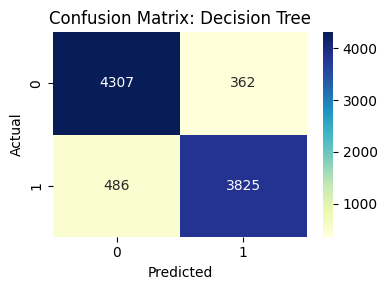


KNN
Accuracy: 0.9092427616926503
ROC-AUC Score: 0.9641968458061454
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4669
           1       0.92      0.89      0.90      4311

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



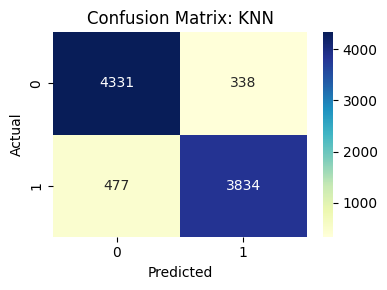


Voting Classifier
Accuracy: 0.9625835189309577
ROC-AUC Score: 0.9943364633420441
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4669
           1       0.97      0.96      0.96      4311

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



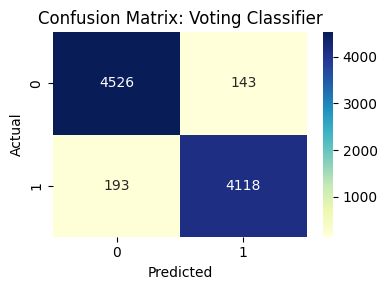

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize models
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = KNeighborsClassifier()

# 2. Create voting classifier
ensemble = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('knn', clf4)],
    voting='soft'
)

# 3. Train all models
models = {
    'Logistic Regression': clf1,
    'Random Forest': clf2,
    'Decision Tree': clf3,
    'KNN': clf4,
    'Voting Classifier': ensemble
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc_auc = "N/A (no predict_proba)"

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Save results
    results[name] = {
        "accuracy": acc,
        "roc_auc": roc_auc,
        "conf_matrix": cm,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

    # Print basic results
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("ROC-AUC Score:", roc_auc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


## 📈 6. Confusion Matrix and ROC Curve

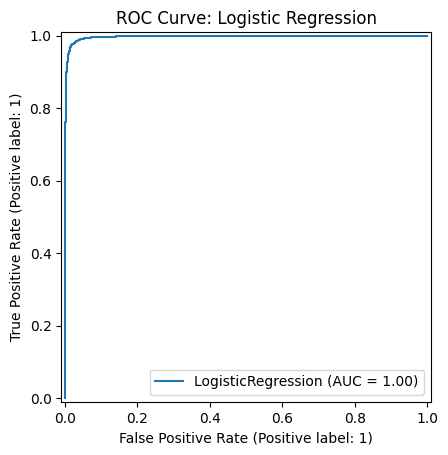

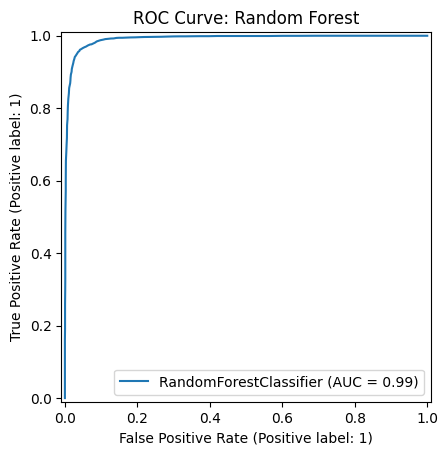

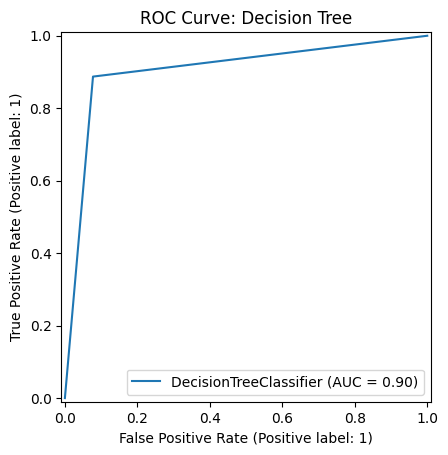

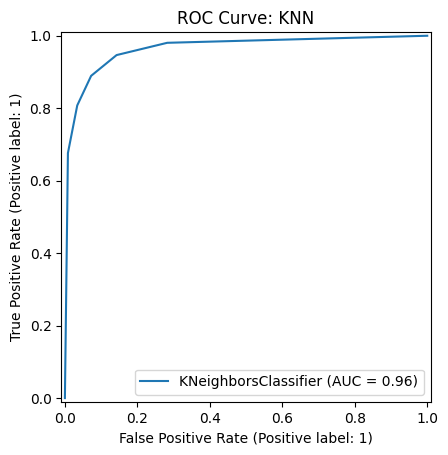

In [16]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': clf1,
    'Random Forest': clf2,
    'Decision Tree': clf3,
    'KNN': clf4
}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve: {name}')
        plt.show()
    else:
        print(f"{name} does not support predict_proba. Skipping.")


##🥓 7. 3D Comparing the models

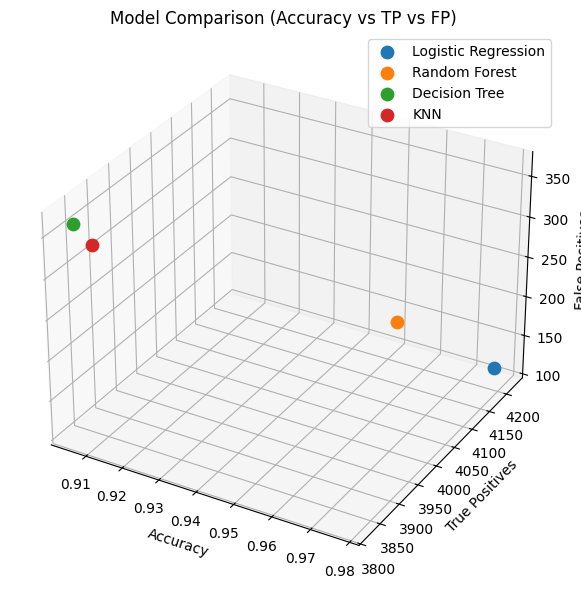

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

model_names = []
accuracies = []
conf_matrices = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    model_names.append(name)
    accuracies.append(acc)
    conf_matrices[name] = cm


for i, name in enumerate(model_names):
    cm = conf_matrices[name]
    tn, fp, fn, tp = cm.ravel()
    ax.scatter(accuracies[i], tp, fp, label=name, s=80)

ax.set_xlabel('Accuracy')
ax.set_ylabel('True Positives')
ax.set_zlabel('False Positives')
ax.set_title('Model Comparison (Accuracy vs TP vs FP)')
ax.legend()
plt.tight_layout()
plt.show()


## 🧠 7. Explainability with SHAP

In [23]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test[:100])
shap.plots.beeswarm(shap_values)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

## 🚀 8. Save Model and Vectorizer

In [24]:
import joblib

joblib.dump(model, "xgb_fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(svd, "svd_transform.pkl")

['svd_transform.pkl']

## 🌐 9. Optional: Streamlit Deployment

In [29]:
!pip install streamlit pyngrok

In [27]:
app_code = '''
import streamlit as st
import joblib
import spacy

# Load models and vectorizers
model = joblib.load("xgb_fake_news_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
svd = joblib.load("svd_transform.pkl")

# Load NLP model once
nlp = spacy.load("en_core_web_sm")

st.title("📰 Fake News Detector")
text = st.text_area("Enter news article text below:")

if st.button('Check News'):
    if text:
        tokens = " ".join([token.lemma_ for token in nlp(text.lower()) if token.is_alpha and not token.is_stop])
        vec = tfidf.transform([tokens])
        reduced = svd.transform(vec)
        prediction = model.predict(reduced)
        st.write("### 🔍 Prediction:", "✅ REAL" if prediction[0] == 1 else "❌ FAKE")

'''

# Write to app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("✅ app.py has been created successfully.")



✅ app.py has been created successfully.


In [34]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://172.28.0.12:8503
  External URL: http://104.199.204.187:8503

  Stopping...
  Stopping...
